In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler,MinMaxScaler
from sklearn.metrics import roc_curve, auc,roc_auc_score,classification_report,precision_recall_curve
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier

In [2]:
df=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [3]:
df_test.shape

(200000, 201)

([<matplotlib.patches.Wedge at 0x195182cbfe0>,
 [Text(-1.045637701821428, 0.34152861743871876, '0'),
  Text(1.0456377316788052, -0.3415285260261626, '1')],
 [Text(-0.5703478373571425, 0.18628833678475568, '90.0%'),
  Text(0.5703478536429846, -0.1862882869233614, '10.0%')])

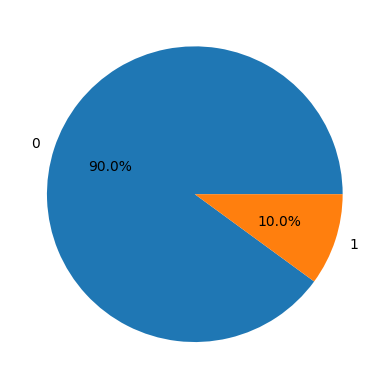

In [4]:
plt.pie(df['target'].value_counts(), labels=df['target'].value_counts().index, autopct='%1.1f%%')

In [5]:
x=df.iloc[:,2:]
y=df.iloc[:,1]
df_test_x=df_test.iloc[:,1:]

In [6]:
corr_matrix = df.iloc[:, 1:].corr()
np.fill_diagonal(corr_matrix.values, 0)
max_corr_values = np.max(np.abs(corr_matrix.values), axis=1)
low_corr_features = corr_matrix.index[max_corr_values < 0.008].tolist()
len(low_corr_features)

31

In [7]:
x.drop(low_corr_features,axis=1,inplace=True)
df_test_x.drop(low_corr_features,axis=1,inplace=True)
x.shape

(200000, 169)

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)
x_train.shape

(140000, 169)

In [9]:
print(np.unique(y_test,return_counts=True))

(array([0, 1]), array([53971,  6029]))


In [43]:
#handeling imbalanced dataset
#30%rus/70%ros:
x_train_under,x_train_over,y_train_under,y_train_over=train_test_split(x_train,y_train,test_size=0.5,random_state=42,stratify=y_train)
rus=RandomUnderSampler(random_state=42)
x_train_rus, y_train_rus=rus.fit_resample(x_train_under,y_train_under)
smote = SMOTE(random_state=42)
x_train_smt, y_train_smt = smote.fit_resample(x_train_over, y_train_over)
x_train_bal = np.concatenate((x_train_rus, x_train_smt), axis=0)
y_train_bal = np.concatenate((y_train_rus, y_train_smt), axis=0)
x_train_bal.shape

(140002, 169)

In [44]:
sc=StandardScaler()
x_train_bal_sc=sc.fit_transform(x_train_bal)
x_test_sc=sc.transform(x_test)

x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


mm= MinMaxScaler()
x_train_bal_mm = mm.fit_transform(x_train_bal)
x_test_mm=sc.transform(x_test)

c:\Users\User\Desktop\MLtasks\env\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\User\Desktop\MLtasks\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [46]:
#trained by imbalanced data
log1=LogisticRegression(max_iter=300,random_state=42)
log1.fit(x_train, y_train)
y_pred=log1.predict(x_test)
log1.score(x_train, y_train),log1.score(x_test,y_test)

(0.9149857142857143, 0.91325)

In [47]:
#pov:for this problem fp costs more than fn ,so i will use percision score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     53971
           1       0.67      0.26      0.38      6029

    accuracy                           0.91     60000
   macro avg       0.80      0.63      0.67     60000
weighted avg       0.90      0.91      0.90     60000



In [48]:
y_prob = log1.predict_proba(x_test)[:, 1] 
fpr2, tpr2, _ = roc_curve(y_test, y_prob)

In [45]:
#maxmin scaler better than standardscaler for this situation by DT model
tree=DecisionTreeClassifier(random_state=42)
tree.fit(x_train_bal_mm, y_train_bal)
y_prob_tree = tree.predict_proba(x_test_mm)[:, 1] 
tree.score(x_train_bal_mm, y_train_bal),tree.score(x_test_mm,y_test)

(1.0, 0.8717666666666667)

In [55]:
fpr1, tpr1, _ = roc_curve(y_test, y_prob_tree)

In [50]:
forest=RandomForestClassifier(random_state=42)
forest.fit(x_train_bal_sc, y_train_bal)
y_prob_forest = forest.predict_proba(x_test_sc)[:, 1] 
forest.score(x_train_bal_sc, y_train_bal),forest.score(x_test_sc,y_test)

(1.0, 0.89245)

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_forest)
optimal_idx = np.argmax(tpr - fpr)  
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

np.float64(0.34)

In [56]:
y_pred_adjusted = (y_prob_forest >= optimal_threshold).astype(int)
print(classification_report(y_test, y_pred_adjusted))

              precision    recall  f1-score   support

           0       0.95      0.65      0.77     53971
           1       0.18      0.68      0.28      6029

    accuracy                           0.65     60000
   macro avg       0.56      0.66      0.53     60000
weighted avg       0.87      0.65      0.72     60000



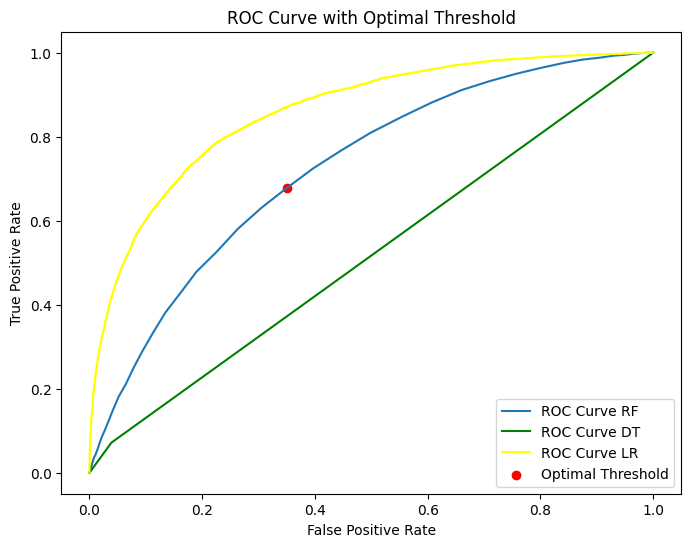

0.8589058622825091


In [58]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label="ROC Curve RF")
plt.plot(fpr1, tpr1, label="ROC Curve DT",color='green')
plt.plot(fpr2, tpr2,label="ROC Curve LR",color='yellow')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', label="Optimal Threshold")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve with Optimal Threshold")
plt.legend()
plt.show()
print(auc(fpr2, tpr2))

In [59]:
target=log1.predict(df_test_x)
df_test['target']=target


c:\Users\User\Desktop\MLtasks\env\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
